#### Loading Libraries

In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.1"

#### Task1 . Load Task2B_train.csv and Task2B_test.csv sets, plot the training data with classes are marked with different colors, and attach the plot to your PDF report.

In [2]:
Task2B_train=read.csv('Task2B_train.csv')
Task2B_test=read.csv('Task2B_test.csv')

Warning message:
"Removed 2500 rows containing missing values (geom_text)."

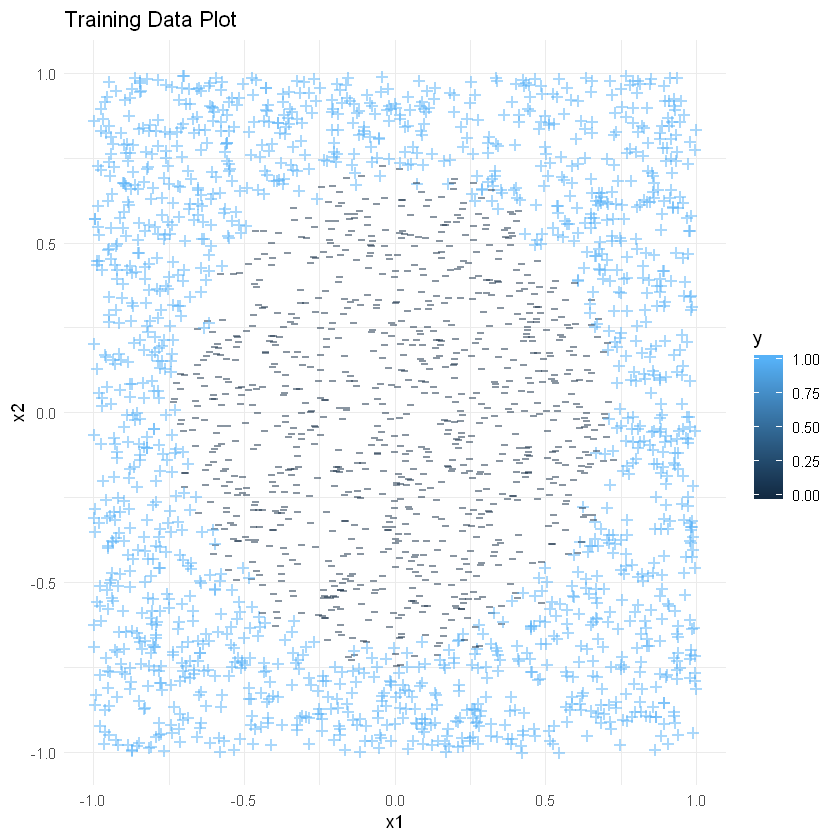

In [3]:
## Take a look at the data set
ggplot(data=Task2B_train, aes(x=x1, y=x2, color=y, label=ifelse(y==1, '+', '-'))) +
    geom_text(size = 5, alpha=0.5) +
    ggtitle ('Training Data Plot') +
    theme_minimal()

#### Task2. Run the implementations of Perceptron given to you in Activity 3.1, calculate the test error, and plot the test data while the points are colored with their estimated class labels

In [4]:
#Replacing 0 by -1
Task2B_train$y[Task2B_train$y==0] <- -1
Task2B_test$y[Task2B_test$y==0]<- -1

#Test and Train Data with Nulls

train_data_NA=Task2B_train[,-3]
test_data_NA=Task2B_test[,-3]
train_label_NA=Task2B_train[3]
test_label_NA=Task2B_test[3]

#Removing Nulls from Data

train.data=train_data_NA[complete.cases(train_data_NA), ]
test.data=test_data_NA[complete.cases(test_data_NA), ]
train.label=train_label_NA[complete.cases(train_label_NA), ]
test.label=test_label_NA[complete.cases(test_label_NA), ]
train.len<-nrow(train.data)
test.len<-nrow(test.data)

In [5]:
dim(test.data)

[1] 2500    2

In [6]:
## Basis function (Step 1)
Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0

In [7]:
# Initialization
set.seed(123)
eta <- 0.01 # Learning rate
epsilon <- 0.001 # Stoping criterion
tau.max <- 100 # Maximum number of iterations
#Labels
c0=-1
c1=1

# If label is 1 the T is 1 else T is -1
T <- ifelse(train.label == c0, eval(parse(text=c0)),eval(parse(text=c1))) # Convention for class labels

W <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
W[1,] <- runif(ncol(Phi)) # Random initial values for weight vector

error.trace <- matrix(0,nrow=tau.max, ncol=1) # Placeholder for errors
error.trace[1] <- sum((Phi%*%W[1,])*T<0)/train.len*100 # record error for initial weights

tau <- 1 # iteration counter 
terminate <- FALSE # termination status

In [8]:
# Main Loop (Step 2):
while(!terminate){
    # resuffling train data and associated labels:
    train.index <- sample(1:train.len, replace = FALSE)
    Phi <- Phi[train.index,]
    T <- T[train.index]

    for (i in 1:train.len){
        if (tau == tau.max) {break}
              
        # look for missclassified samples
        if ((W[tau,]%*%Phi[i,])*T[i]<0){
            
            # update tau counter
            tau <- tau +1
            
            # update the weights
            W[tau,] <- W[tau-1,] + eta * Phi[i,] * T[i]
            
            # update the records
            error.trace[tau] <- sum((Phi%*%W[tau,])*T<0)/train.len*100
        } 
        
    }
    
    # decrease eta:
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max | 
        abs(sum((Phi%*%W[tau,])*T<0)/train.len - sum((Phi%*%W[tau-1,])*T<0)/train.len) <= epsilon 
    
}
W <- W[1:tau,] # cut the empty part of the matrix (when the loop stops before tau == tau.max)

In [9]:
## the  final result is w:
w <- W[tau,]
## report
cat('\n\nThe  final weight vector:', w)



The  final weight vector: 0.2175775 0.4047789 0.2207639

**Runing the perceptron model on test data**

In [10]:
Phi_test <- as.matrix(cbind(1, test.data)) #Basis Function for test data
miss <- 0 # Placeholder for errors

In [11]:
# resuffling test data and associated labels:
T_new <- ifelse(test.label == c0, eval(parse(text=c0)),eval(parse(text=c1))) # Convention for class labels
test.index <- sample(1:test.len, replace = FALSE)
Phi_test <- Phi_test[test.index,]
T_new <- T_new[test.index]

for (i in 1:test.len){

    # look for missclassified samples
    if ((w%*%Phi_test[i,])*T_new[i]<0){

        # update the missclassification
        miss<- miss+1
    } 

}

In [12]:
#Calculaing Perceptron Test Error

perceptron_test_error=miss/test.len
perceptron_test_error

[1] 0.5432

**Plotting Test Dataset predictions by perceptron**

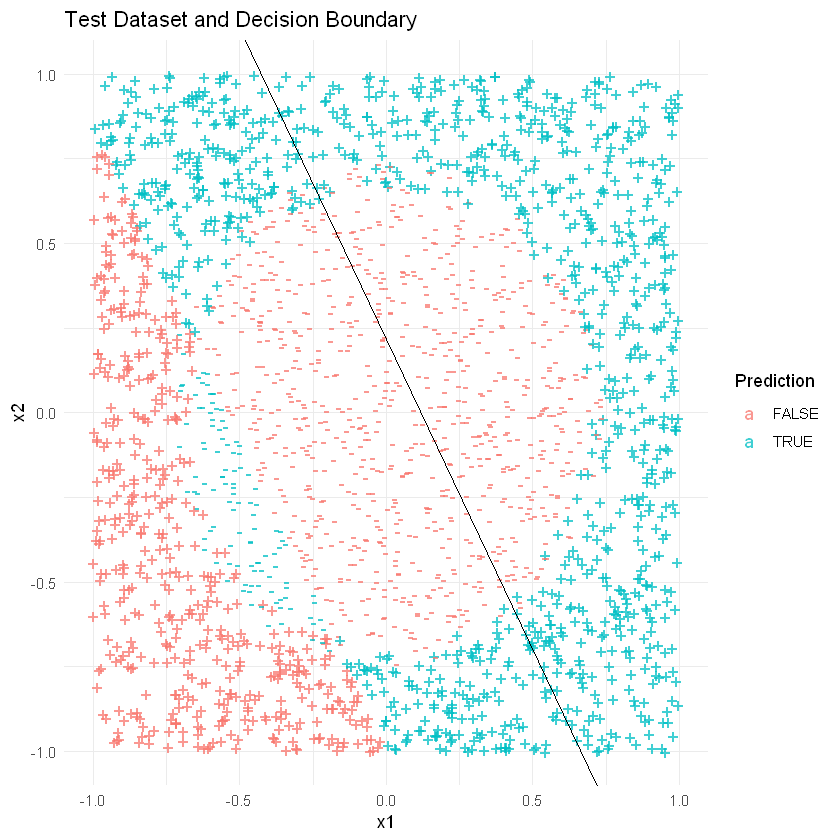

In [13]:
ggplot(data=as.data.frame(Phi_test), aes(x=x1, y=x2, label=ifelse(T_new!=c0, '+', '-'), color=factor(Phi_test%*%w*T_new>0))) +
    geom_text(alpha=0.75) +
    scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    geom_abline(intercept=w[1], slope=-w[2]/w[3]) +
    ggtitle('Test Dataset and Decision Boundary') +
    theme_minimal()

**Task3. Run the 3-layer Neural Network given to you in Activity 5.1 with different values of K
    (i.e, number of units in the hidden layer) and record testing error for each of them;
    plot the error vs K and attach it to your PDF report. Based on this plot, find the best K and
    the corresponding model, then plot the test data while the points are colored with
    their estimated class labels using the best model that you have selected**

In [14]:
#Preparing Data

N<-nrow(test.data)
## convert data and labels to matrices
X1 <- t(unname(data.matrix(train.data))) 
T1 <- t(data.matrix(as.numeric(train.label))) 

X2 <- t(unname(data.matrix(test.data))) 
T2 <- t(data.matrix(as.numeric(test.label))) 

In [15]:

## General Auxilary Functions

list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

# Function to calculate error
error.rate <- function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true lables and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

####################### NEURAL NET ####################### 
## the activation function (tanh here)

h <- function(z, a=1) {
#activation function (sigmoid here)
  return ((exp(z)-a^(-z))/(exp(z)+exp(-z)))
}
## the derivitive of the activation function (tanh here)
h.d <- function(z, a=1) {
  return (1-(h(z, a))^2)
}
## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}
## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}
## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}
## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))
}

## NN build function
nn.build <- function(K, X1, T1,X2,T2, tracing=TRUE,plotting=FALSE, epoch.max=50, eta = 0.1, lambda = 0.001){

  # initialization
  if (tracing) {train.error <- matrix(0,nrow=epoch.max, ncol=1); test.error <- train.error}
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
      
    ## record the test errors for each iteration (epoch)
    if (tracing){train.error[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)
                  test.error[epoch]<- error.rate(nn.predict(X2, W1, W2, b1, b2), T2)
                  
                 }
  }
    
  if(plotting){
    T_new <- as.vector(t(T2))
    Phi_test <- as.data.frame(cbind(1, t(X2)))
    names(Phi_test) <- c("1", "x1","x2")
      
    plot<-ggplot(data=as.data.frame(Phi_test), aes(x=x1, y=x2, label=ifelse(T_new!=-1, '+', '-'), color=factor(nn.predict(X2, W1, W2, b1, b2)*T_new >0))) +
    geom_text(alpha=0.75) +scale_color_discrete(guide = guide_legend(title = 'Prediction'))+
    ggtitle('Predicted Test Dataset') +
    theme_minimal()
      
    return(plot)
      
  }
    
  return(test.error[epoch.max])  #Returns the test error for last iteration of epoch=1000 (epoch.max)
}



In [16]:
K=seq(2,100,2)  #vary the number of units in hidden layer 2,4,6,....100

#Store results in data frame
results <- data.frame(k=rep(K, each=1),test=rep(0, length(K)))
for (k in K){
        results[results$k==k, c('test')] <-nn.build(k,X1,T1,X2,T2,tracing=TRUE,epoch.max=1000)
}

### Error vs K Plot

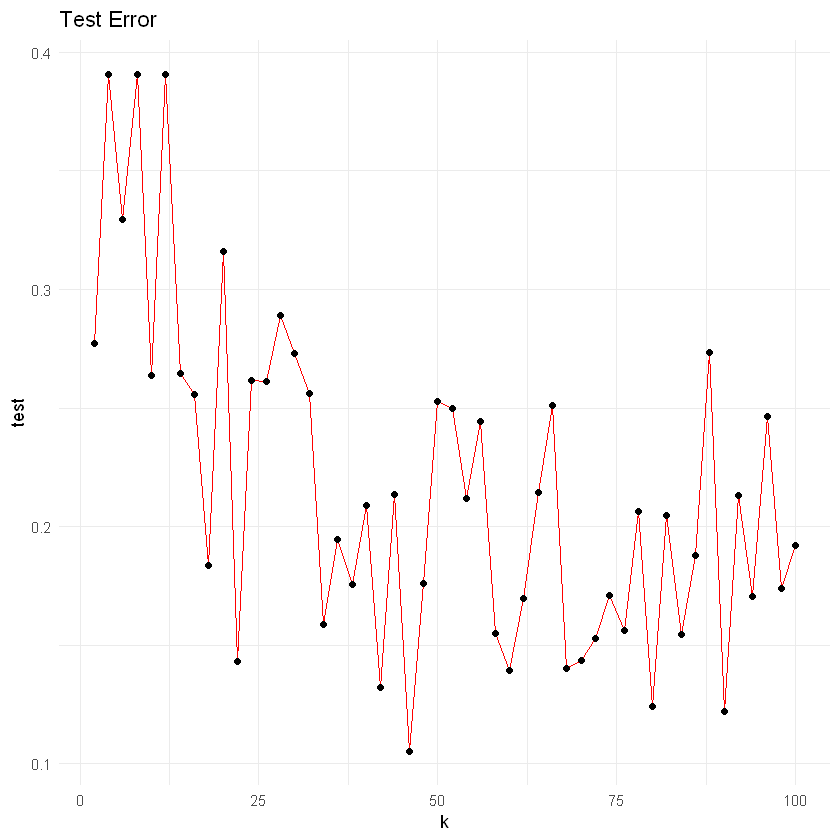

In [17]:
ggplot(data=results, aes(k, test)) + geom_line(color='Red')+ ggtitle('Test Error') + theme_minimal()+geom_point()

**Task4. Recording test error for perceptron and different variants of Neural Network for different K's.**

In [18]:
library(dplyr)
# Comparing test error for perceptron and Neural Network for different K's.
error_table <- results %>% select(k,test) %>% rename(NN_test_error=test)
error_table<-cbind(error_table,perceptron_test_error)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [19]:
#Record of test errors for different variants of NN and perceptron
error_table

k,NN_test_error,perceptron_test_error
<dbl>,<dbl>,<dbl>
2,0.2772,0.5432
4,0.3908,0.5432
6,0.3296,0.5432
8,0.3908,0.5432
10,0.2636,0.5432
12,0.3908,0.5432
14,0.2644,0.5432
16,0.2556,0.5432
18,0.1836,0.5432


#### Best value of K

We found the best value of k=46 and the Neural network model gives an error of 10.52%

In [20]:
min_error = error_table[which.min(error_table[,2]),]
min_error

,k,NN_test_error,perceptron_test_error
,<dbl>,<dbl>,<dbl>
23,46,0.1052,0.5432


#### Plot for test data prediction by Neural Network for best value of k (Task 3)

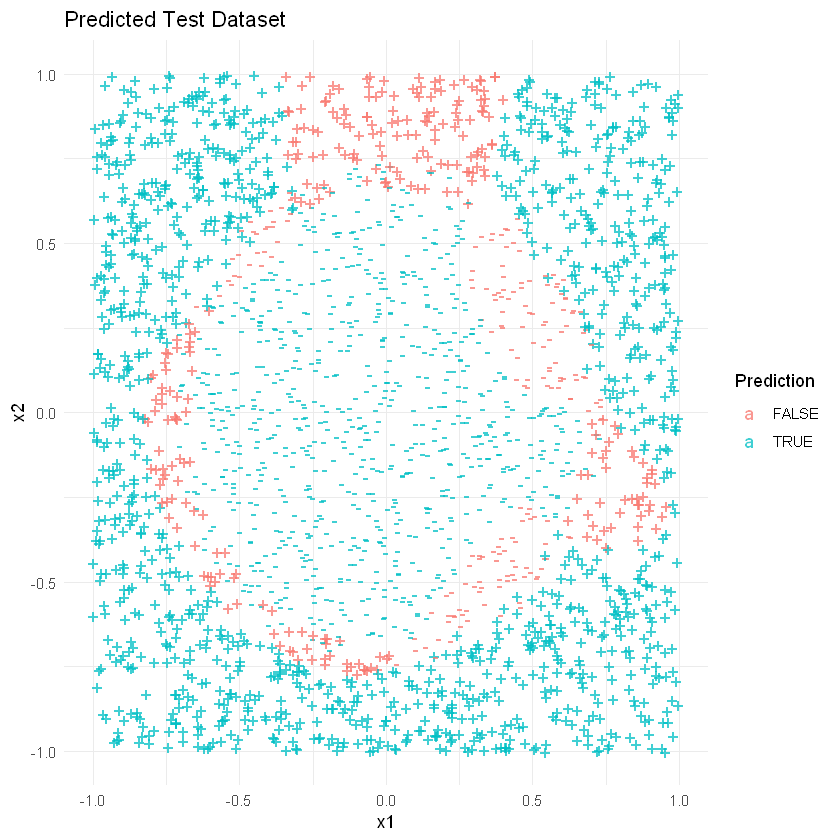

In [22]:
nn.build(46,X1,T1,X2,T2,tracing=FALSE,plotting=TRUE,epoch.max=1000)

**Task5. In your PDF report explain the reason(s) responsible for such difference between perceptron and a 3-layer NN.**

* The neural network comprises of several stages, each of which resembles a perceptron.Hence it is also called Multilayer Perceptron.


* Here we get best test error of Neural Network as 10.52% for k=46 whereas for perceptron we get the test error as 54.32%.
  It is evident that the performance of Neural network is far better than the perceptron.
  

* The main reason for such a difference in performance is that a neural network uses continuous nonlinearities in the hidden units (e.g. σ(.) or tanh), whereas the perceptron uses step-function nonlinearities.


* This layered architecture enables the neural network to model the data which is not lineraly separable and minimise the test error to a much greater extent as compared a perceptron.